In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.utils import load_img, img_to_array
import joblib

In [2]:
# Function to load and prepare the image
def load_and_prepare_image(image_path, target_size=(48, 48)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array

In [3]:
# Function to extract HOG features
def extract_hog_features(image_array):
    hog_features, hog_image = hog(image_array, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    return hog_features

In [4]:
# Function to load images and labels from a directory
def load_images_from_directory(directory, target_size=(48, 48)):
    images = []
    labels = []
    for label_dir in os.listdir(directory):
        label_path = os.path.join(directory, label_dir)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                img_array = load_and_prepare_image(image_path, target_size)
                hog_features = extract_hog_features(img_array)
                images.append(hog_features)
                labels.append(label_dir)
    return np.array(images), np.array(labels)

In [5]:
# Function to train the SVM model
def train_svm_model(X_train, y_train):
    model = svm.SVC(kernel='linear', probability=True)
    model.fit(X_train, y_train)
    return model

In [6]:
# Function to evaluate the SVM model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

In [7]:
# Directories for training and testing data
train_dir = 'train'
test_dir = 'test'

In [8]:
# Load training and testing data
X_train, y_train = load_images_from_directory(train_dir)
X_test, y_test = load_images_from_directory(test_dir)

In [9]:
# Shuffle and split the dataset if needed (optional)
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [10]:
# Train the SVM model
svm_model = train_svm_model(X_train, y_train)

In [11]:
# Evaluate the SVM model
evaluate_model(svm_model, X_test, y_test)

Accuracy: 0.4446921147952076
Classification Report:
              precision    recall  f1-score   support

       angry       0.32      0.30      0.31       958
     disgust       0.49      0.22      0.30       111
        fear       0.31      0.24      0.27      1024
       happy       0.57      0.73      0.64      1774
     neutral       0.41      0.44      0.43      1233
         sad       0.33      0.29      0.31      1247
    surprise       0.59      0.52      0.55       831

    accuracy                           0.44      7178
   macro avg       0.43      0.39      0.40      7178
weighted avg       0.43      0.44      0.43      7178

Confusion Matrix:
[[ 284    4  104  183  165  169   49]
 [  31   24   13   15    5   20    3]
 [ 128   10  250  183  152  184  117]
 [ 100    4   85 1298  106  141   40]
 [ 115    3  114  235  545  174   47]
 [ 177    3  135  271  259  363   39]
 [  65    1   97  112   86   42  428]]


In [12]:
# Function to predict emotion from a single image
def predict_emotion(image_path, model):
    img_array = load_and_prepare_image(image_path)
    hog_features = extract_hog_features(img_array)
    hog_features = hog_features.reshape(1, -1)
    prediction = model.predict(hog_features)
    return prediction[0]

In [13]:
# Path to the image for testing
test_image_path = 'test/disgust/PrivateTest_807646.jpg'

In [14]:
# Predict the emotion of the test image
predicted_emotion = predict_emotion(test_image_path, svm_model)
print(f"The predicted emotion for the test image is: {predicted_emotion}")

The predicted emotion for the test image is: angry


In [15]:
# Function to visualize the prediction
def visualize_prediction(image_path, prediction):
    img = load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    img_array = img_to_array(img)
    
    plt.imshow(img_array.squeeze(), cmap='gray')
    plt.title(f"Predicted Emotion: {prediction}")
    plt.axis('off')
    plt.show()

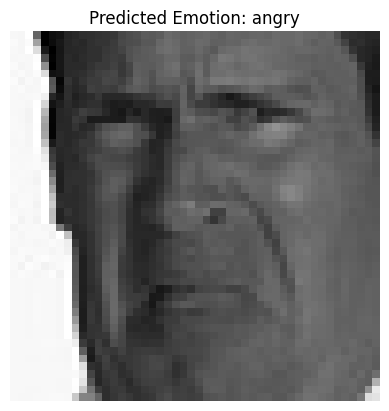

In [16]:
# Visualize the prediction
visualize_prediction(test_image_path, predicted_emotion)

In [19]:
# Save the trained model
model_path = 'svm_emotion_model.joblib'
joblib.dump(svm_model, model_path)
print(f"Model saved to {model_path}")

Model saved to svm_emotion_model.joblib
